# Imports

In [1]:
%load_ext autoreload
%autoreload 2
%run nnn/ipynb_init.py
%matplotlib inline
import nupack
from sklearn.model_selection import train_test_split

# Data prep

## Basic filtering

This removes non-hairpin forming control constructs to make model training easier.

### arr_v0

No 2 state filter. Not really used but kept to be consistent with historical analysis.

86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
64.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
71.46% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
Load from file ./data/fitted_variant/NNNlib2b_DNA_20211022_v6.CPvariant.gz
86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
Load from file ./data/fitted_variant/NNNlib2b_DNA_20211216_v9.CPvariant.gz
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5

Combining dH

Combining Tm

Combining dG_37

Combining dS

Combining fmax

Combining fmin
(30751, 42)


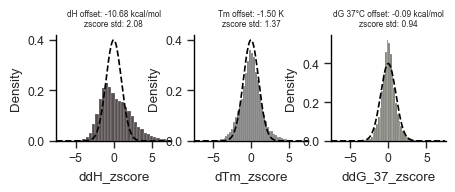

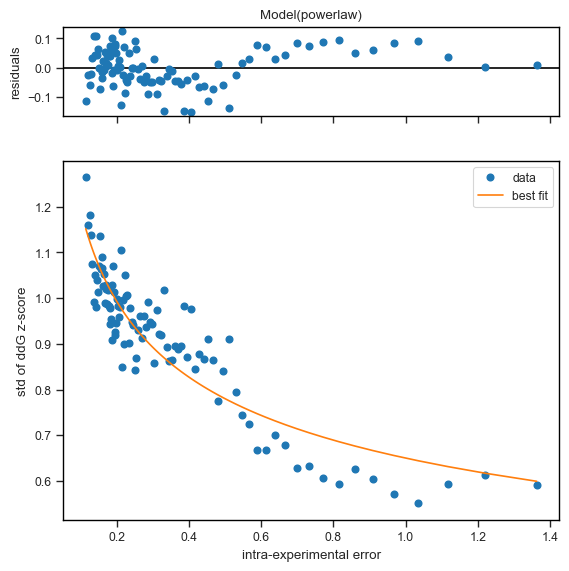

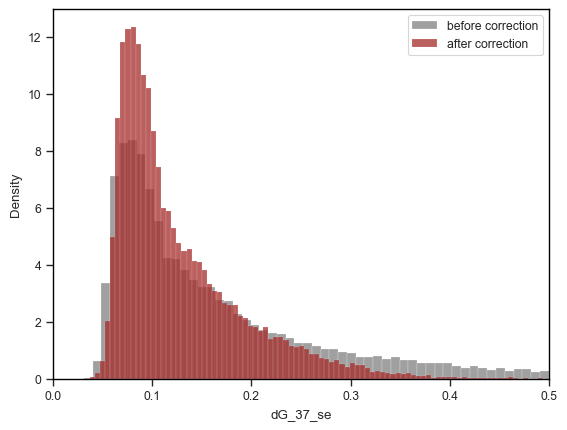

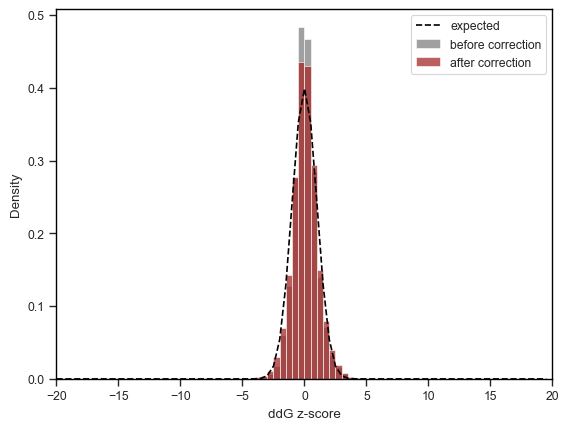

In [3]:
annotation_file = './data/annotation/NNNlib2b_annotation_20220519.tsv'
annotation = fileio.read_annotation(annotation_file)
replicate_df = pd.read_table('./data/nnnlib2b_replicates.tsv')
arraydata = ArrayData(replicate_df=replicate_df.iloc[:4,:],
                      annotation_file=annotation_file,
                      learn_error_adjust_from=('r1', 'r2'))
arr = arraydata.data.join(arraydata.annotation)

excluded_construct_type = ['pseudoknot_pt_muts', 'PolyNTControls', 'RepeatControls', 'StemDangle_3p', 'StemDangle_53p', 'StemDangle_5p', 'PUMcontrols']
arr = arr[arr.reset_index().ConstructType.apply(lambda s: s not in excluded_construct_type).values]
arr = arr.dropna(subset=['ConstructType', 'RefSeq','TargetStruct'])

print(arr.shape)
arr.to_csv(os.path.join('./data/models/raw', 'arr_v0_n=%d.csv' % arr.shape[0]))

### arr_v1

With (relaxed) 2-state filter & variant-level Tm filter.

```
arraydata = ArrayData(replicate_df=replicate_df.iloc[:4,:],
                    annotation_file=annotation_file)
```
somehow broke at some point. Cannot load rev replicate normally.
Temporarily excluded the replicate and saved to `arr_v1_n=27614.csv`

Later it worked again. Reverted back to `n=27732`

86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
64.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
71.46% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
64.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
71.46% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5


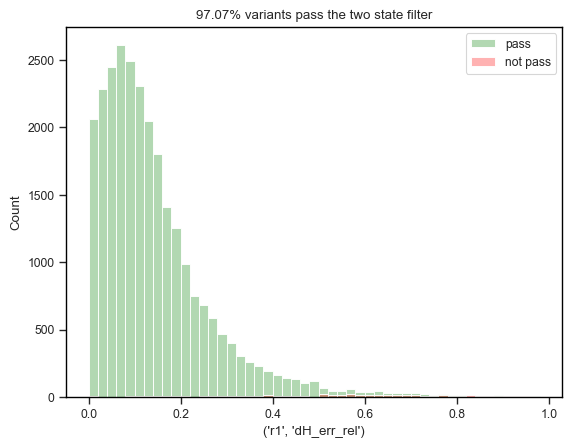

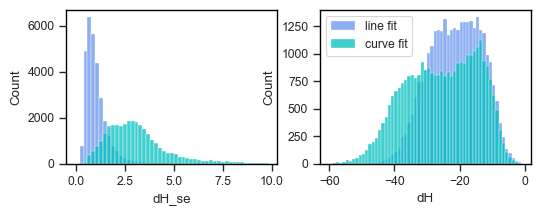

(27732, 45)


In [4]:
annotation_file = './data/annotation/NNNlib2b_annotation_20220519.tsv'
annotation = fileio.read_annotation(annotation_file, sodium=0.083)
replicate_df = pd.read_table('./data/nnnlib2b_replicates.tsv')

arraydata = ArrayData(replicate_df=replicate_df.iloc[:4,:],
                    annotation_file=annotation_file)

myfilter = "dH_err_rel < 0.5 & Tm_err_abs < 10 & redchi < 2 & n_inlier > 8"
pass_df = arraydata.filter_two_state(min_rep_pass=1, force_recalculate=True, overwrite_dH=False, 
                                     inplace=True, myfilter=myfilter)

variant_filter = 'Tm < 60 & Tm > 0'
arr = arraydata.data.join(arraydata.annotation).query(variant_filter)

excluded_construct_type = ['pseudoknot_pt_muts', 'PolyNTControls', 'RepeatControls', 'StemDangle_3p', 'StemDangle_53p', 'StemDangle_5p', 'PUMcontrols']
arr = arr[arr.reset_index().ConstructType.apply(lambda s: s not in excluded_construct_type).values]
arr = arr.dropna(subset=['ConstructType', 'RefSeq','TargetStruct'])

print(arr.shape)
arr.to_csv(os.path.join('./data/models/raw', 'arr_v1_n=%d.csv' % arr.shape[0]))

### arr_p_unfold

For sequence-to-melt-curve deep learning models. Control variants excluded in the arr file for structure energy models are included here.

86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
64.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
71.46% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
Load from file ./data/fitted_variant/NNNlib2b_DNA_20211022_v6.CPvariant.gz
86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
Load from file ./data/fitted_variant/NNNlib2b_DNA_20211216_v9.CPvariant.gz
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5

Combining dH

Combining Tm

Combining dG_37

Combining dS

Combining fmax

Combining fmin


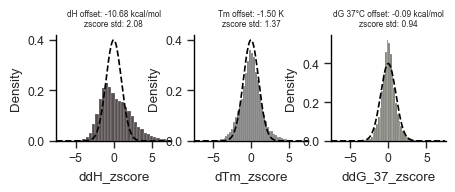

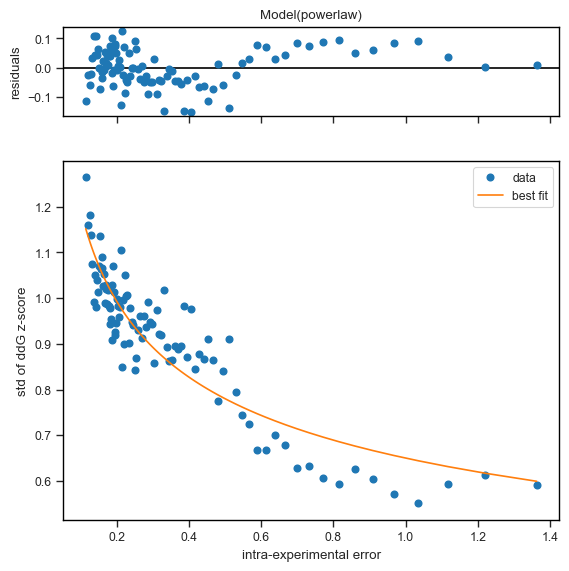

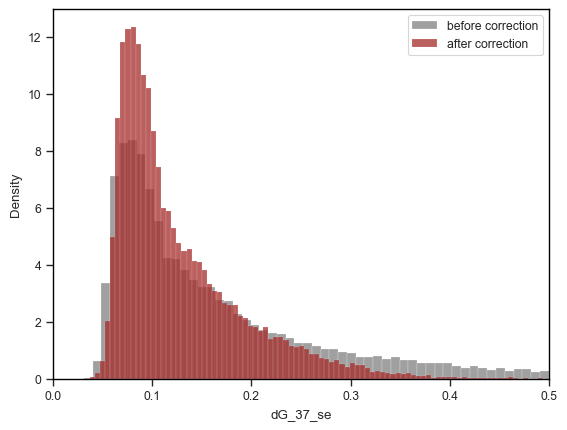

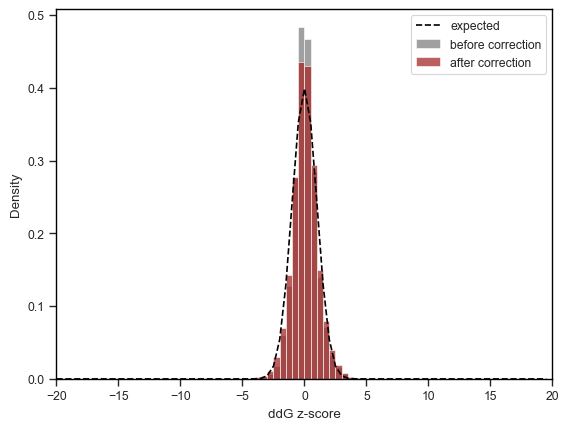

In [5]:
annotation_file = './data/annotation/NNNlib2b_annotation_20220519.tsv'
annotation = fileio.read_annotation(annotation_file)
replicate_df = pd.read_table('./data/nnnlib2b_replicates.tsv')
arraydata = ArrayData(replicate_df=replicate_df.iloc[:4,:],
                      annotation_file=annotation_file,
                      learn_error_adjust_from=('r1', 'r2'))

arraydata.p_unfold.to_csv('./data/models/raw/arr_p_unfold_n=%d.csv'%len(arraydata.p_unfold))

## Basic preprocessing

### Adjust offset

In [6]:
arr = pd.read_csv('./data/models/raw/arr_v1_n=27732.csv', index_col=0)

(-4.0, 0.0)

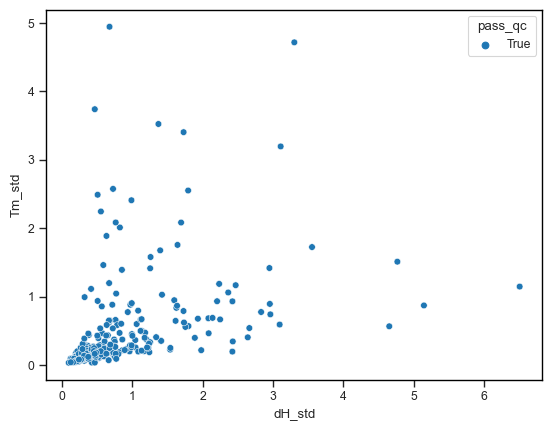

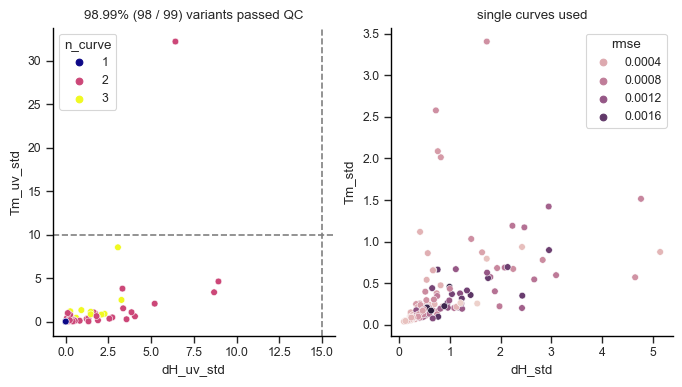

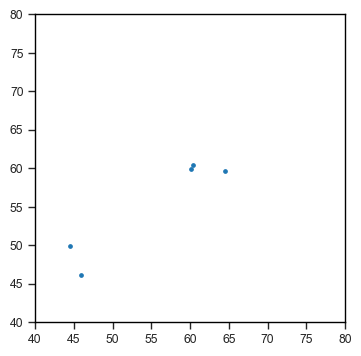

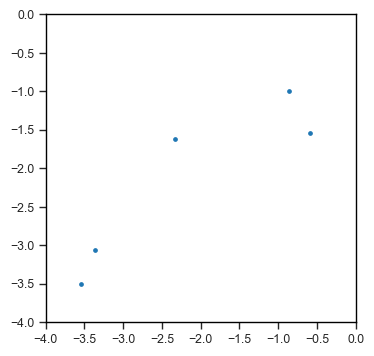

In [7]:
"""
Get the offset the violent way
"""
# copy pasted from command center for convenience
# only one peak found by AnalyzePeaks
hplc_clean_seqid = ["WC68_stem_3p", "WC68_stem_5p", "WC1025_split_5p", \
"WC1025_split_3p", "WC1375_stem_5p", "WC1375_stem_3p", "DMM004_5p", \
"DMM004_3p", "DMM005_5p", "DMM005_3p", "DMM006_5p", "DMM007_5p", \
"DMM007_3p", "BC0", "BC1", "BC6", "BC7", "BC8", "BC9", "BC10", \
"BC11", "MMCNNN2328", "MMCNNN2331", "MMCNNN2334", "MMCNNN2335", \
"MMCNNN2336", "MMCNNN2337", "MMTM1325", "MMTM176", "MMTM178", \
"MMTM179", "MMTM181", "MMTM185", "MMTM189", "MMTM1917", "MMTM29", \
"MMTM397", "MMTM509", "MMTM877", "DMM003_3p_rc", "DMM004_3p_rc", \
"DMM005_3p_rc", "DMM006_3p_rc", "DMM007_3p_rc", "TETNN1003", \
"TETNN999", "TETNN963", "TETNN979", "TETNNN1696", "TETNNN2082", \
"TETNNN1570", "HP002", "HP003", "HP004", "HP005", "HP007", "HP008", \
"HP010", "HP011", "HP012", "HP014", "HP015", "HP016", "HP017", \
"HP018", "HP019", "HP021", "HP022", "HP023", "HP024"]

sample_sheet_file = './data/uv_melt/ECLTables/ECLSampleSheet230502.csv'
datadir="./data/uv_melt/ECLExportAuto"
result_file='./data/uv_melt/uvmelt_230502_2.csv'
agg_result_file='./data/uv_melt/uvmelt_agg_230502.csv'

result_df = pd.read_csv(result_file, index_col=0)
result_agg_df = uv.agg_fit_result(uvmelt_result_file=result_file,
                               agg_result_file=agg_result_file,
                               single_curve_qc_criteria='rmse < 0.002 & dH_std < 10 & Tm_std < 5 & dH < 0 & dH > -100 & Tm > 0 & Tm < 120',
                               Tm_std_thresh=10, dH_std_thresh=15,
                               sample_sheet_file=sample_sheet_file, 
                               clean=True, only_use_cooling=True)

result_agg_df = result_agg_df[result_agg_df.SEQID.isin(hplc_clean_seqid)]

vf = result_agg_df.query('is_hairpin & Na_mM == 25').sort_values(by=['conc_uM', 'n_curve', 'curve_date']).drop_duplicates(keep='last').merge(arr, how='left', on='SEQID')

df_q = vf.dropna(subset=['Tm', 'dG_37'])#.query(plot_query)
df_q.dG_37_uv_std = 0

dTm = np.median(df_q.Tm_uv - df_q.Tm)
df_q['Tm_adj'] = df_q.Tm + dTm
df_q['dG_37_adj'] = util.get_dG(dH=df_q.dH, Tm=df_q.Tm_adj, celsius=37)

plt.figure(figsize=(4,4))
plt.plot(df_q.Tm_uv, df_q.Tm_adj, '.')
lim = [40,80]
plt.xlim(lim)
plt.ylim(lim)

plt.figure(figsize=(4,4))
plt.plot(df_q.dG_37_uv, df_q.dG_37_adj, '.')
lim = [-4,0]
plt.xlim(lim)
plt.ylim(lim)

In [8]:
def adjust_offset(dH, Tm, dTm):
    Tm_adj = Tm + dTm
    dG_37_adj = util.get_dG(dH=dH, Tm=Tm_adj, celsius=37)
    dS_adj = dH / (Tm_adj + 273.15)
    return dict(dH=dH, dS=dS_adj, Tm=Tm_adj, dG_37=dG_37_adj)

cols = ['dH_se', 'Tm_se', 'dG_37_se', 'dS_se', 'RefSeq', 'TargetStruct', 'Series']
arr_adj = pd.DataFrame(adjust_offset(arr.dH, arr.Tm, dTm))
arr_adj[cols] = arr[cols]

arr_adj.to_csv(os.path.join('./data/models/processed', 'arr_v1_adjusted_n=%d.csv' % arr_adj.shape[0]))

In [9]:
dTm

9.348410006623254

### Salt correct array data to fucking 1M Na+

`arr_adj` -> `arr_1M`

In [10]:
%%time
param_names = ['dH','dS','Tm', 'dG_37']
arr_1M = pd.DataFrame(index=arr_adj.index, columns=param_names)

for i, row in arr_adj.iterrows():
    param_name_dict = util.get_Na_adjusted_param(Na=1.0,dH=row.dH, Tm=row.Tm, seq=row.RefSeq)
    arr_1M.loc[i,:] = param_name_dict

arr_1M[cols] = arr[cols]

# remove dangles
# they should have been removed already but just in case
sd_mask = arr_1M.apply(lambda row: not row.name.startswith('SD'), axis=1)
arr_1M = arr_1M[sd_mask.values]

arr_1M.to_csv('./data/models/processed/arr_v1_1M_n=%d.csv'%arr_1M.shape[0])

CPU times: user 5.61 s, sys: 24.8 ms, total: 5.64 s
Wall time: 5.65 s


## Rude preprocessing

### Original to 1M Na+

`arr -> arr_1M`

In [11]:
arr = pd.read_csv('./data/models/raw/arr_v1_n=27732.csv', index_col=0)

In [12]:
%%time
param_names = ['dH','dS','Tm', 'dG_37']
arr_1M = pd.DataFrame(index=arr.index, columns=param_names)

for i, row in arr.iterrows():
    param_name_dict = util.get_Na_adjusted_param(Na=1.0,dH=row.dH, Tm=row.Tm, seq=row.RefSeq)
    arr_1M.loc[i,:] = param_name_dict

cols = ['dH_se', 'Tm_se', 'dG_37_se', 'dS_se', 'RefSeq', 'TargetStruct', 'Series']
arr_1M[cols] = arr[cols]

# remove dangles
# they should have been removed already but just in case
sd_mask = arr_1M.apply(lambda row: not row.name.startswith('SD'), axis=1)
arr_1M = arr_1M[sd_mask.values]

arr_1M.to_csv('./data/models/processed/arr_v2_1M_n=%d.csv'%arr_1M.shape[0])

CPU times: user 5.67 s, sys: 27.4 ms, total: 5.69 s
Wall time: 5.71 s


### Adjust offset w.r.t. NUPACK (maybe slightly circular)

`arr_1M -> arr_1M_adj`

Only use training data for adjustment.

In [13]:
arr_1M = pd.read_csv('./data/models/processed/arr_v2_1M_n=27732.csv', index_col=0)
data_split_dict = fileio.read_json('./data/models/raw/data_split.json')

In [14]:
arr_1M_train = arr_1M.loc[[x for x in arr_1M.index if x in data_split_dict['train_ind']]]

arr_1M_train = arr_1M_train.join(arr[['ConstructType', 'dG_37_NUPACK', 'Tm_NUPACK']])

<Axes: xlabel='ddG_37', ylabel='Density'>

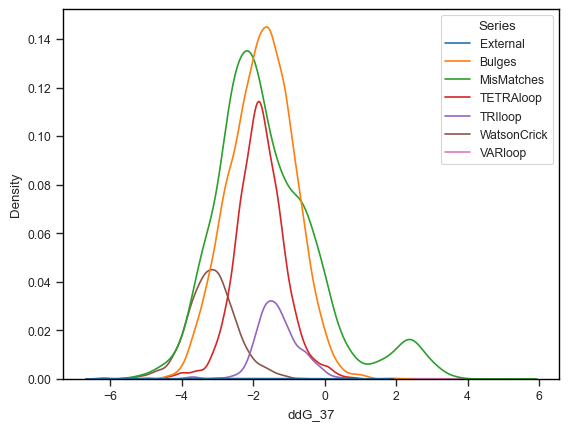

In [15]:
arr_1M_train['ddG_37'] = arr_1M_train.dG_37_NUPACK - arr_1M_train.dG_37
sns.kdeplot(data=arr_1M_train, x='ddG_37', hue='Series')

<Axes: xlabel='dTm', ylabel='Density'>

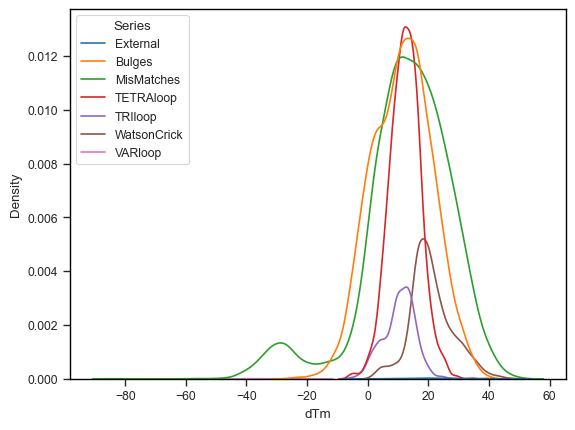

In [16]:
arr_1M_train['dTm'] = arr_1M_train.Tm_NUPACK - arr_1M_train.Tm
sns.kdeplot(data=arr_1M_train, x='dTm', hue='Series')

<Axes: xlabel='ddG_37', ylabel='Density'>

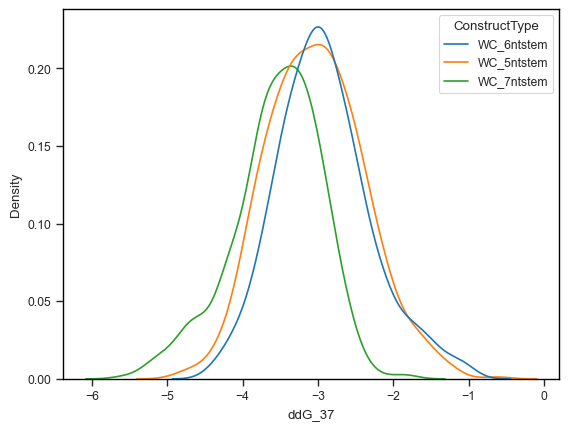

In [17]:
sns.kdeplot(data=arr_1M_train.query('Series == "WatsonCrick"'), x='ddG_37', hue='ConstructType')

In [18]:
dTm_by_series = arr_1M_train.groupby(['Series', 'ConstructType'])['dTm'].apply(np.median).fillna(value=0)
dTm_by_series

Series       ConstructType     
Bulges       NNN_3primebulge       10.005800
             NNN_5prime_bulge      12.147991
             NN_3primebulge        22.231302
             NN_5primebulge        22.455473
External     BaeControls           20.294685
             WBcontrols             0.000000
MisMatches   3mer                  11.585653
             AC_mismatch_varpos    26.345570
             Centered              17.193788
             GT_mismatch_varpos     6.527488
TETRAloop    NN                    16.742231
             NNN                   11.729666
TRIloop      NN                    15.616951
             NNN                   10.190561
VARloop      VARloop              -35.681387
WatsonCrick  WC_5ntstem            26.291553
             WC_6ntstem            19.304034
             WC_7ntstem            17.750857
Name: dTm, dtype: float64

In [19]:
arr_1M_train['Tm_adj'] = arr_1M_train.apply(lambda row: row.Tm + dTm_by_series[row['Series']][row['ConstructType']], axis=1)

In [20]:
arr_1M_train[['Tm', 'Tm_adj']]

,Tm,Tm_adj
SEQID,,
BC1,54.750994,75.045680
BC10,29.959820,50.254505
BC11,33.906068,54.200753
BC15,41.645712,61.940398
BC16,35.963347,56.258033
...,...,...
varloop257581,65.502814,29.821427
varloop257601,49.375317,13.693931
varloop257621,44.087860,8.406473


In [21]:
def recalculate(dH, Tm_adj):
    dG_37_adj = util.get_dG(dH=dH, Tm=Tm_adj, celsius=37)
    dS_adj = dH / (Tm_adj + 273.15)
    return dict(dH=dH, dS=dS_adj, Tm=Tm_adj, dG_37=dG_37_adj)

cols = ['dH_se', 'Tm_se', 'dG_37_se', 'dS_se', 'RefSeq', 'TargetStruct', 'Series']
arr_adj = pd.DataFrame(recalculate(arr_1M_train.dH, arr_1M_train.Tm_adj))
arr_adj[cols] = arr[cols]

arr_adj.to_csv(os.path.join('./data/models/processed', 'arr_v2_adjusted_n=%d.csv' % arr_adj.shape[0]))

## Update data split

Remove the variants measured by UV melting from the training set.

In [22]:
agg_result_file='./data/uv_melt/uvmelt_agg_230502.csv'
uv_df = pd.read_csv(agg_result_file, index_col=1)
arr_1M = pd.read_csv('./data/models/processed/arr_v1_1M_n=27732.csv', index_col=0)
arr_p_unfold = pd.read_csv('./data/models/raw/arr_p_unfold_n=31000.csv', index_col=0)


In [23]:
from sklearn.model_selection import train_test_split

ind2split = list(set(arr_1M.index) - set(uv_df.index))
series2split = arr_1M.loc[ind2split, 'Series']

train_val_ind, test_ind = train_test_split(ind2split, test_size=.05,
                                       random_state=42, stratify=series2split)
train_ind, val_ind = train_test_split(arr_1M.loc[train_val_ind,:].index, test_size=.05,
                                      random_state=43, stratify=arr_1M.loc[train_val_ind,:].Series)
test_ind += list(set(uv_df.index) & set(arr_1M.index))
n_train, n_val, n_test = len(train_ind), len(val_ind), len(test_ind)
print('train','val ','test')
print(n_train, n_val, n_test)

split_dict = dict(train_ind=train_ind.tolist(),
                  val_ind=val_ind.tolist(),
                  test_ind=test_ind)
with open('./data/models/raw/data_split.json', 'w') as fh:
    json.dump(split_dict, fh, indent=4)

additional_ind = list(set(arr_p_unfold.index) - set(arr_1M.index))

additional_train_val_ind, additional_test_ind = train_test_split(additional_ind, test_size=.1,
                                       random_state=44)
additional_train_ind, additional_val_ind = train_test_split(arr_p_unfold.loc[additional_train_val_ind,:].index.tolist(), test_size=.1,
                                      random_state=45)

split_dict['train_ind'] += additional_train_ind
split_dict['val_ind'] += additional_val_ind
split_dict['test_ind'] += additional_test_ind

fileio.write_json(split_dict, './data/models/raw/data_split_p_unfold.json')

train val  test
24979 1315 1438


## Other data prep

In [347]:
"""
ECL uv data cleaning
Reduced to HP only as the reset are already in the array dataset.
"""
from nnn import train_nn as tnn

mydata = tnn.MyData()
mydata.load_everything()

uv_agg_df = fileio.clean_uv_df(mydata.uv_df, mydata.ecl_oligo_df, mydata.annotation)
uv_agg_df = uv_agg_df.reset_index(names=['SEQID'])
uv_agg_df = uv_agg_df.loc[uv_agg_df.SEQID.apply(lambda x: x.startswith('HP'))]
uv_agg_df = uv_agg_df.set_index('SEQID')
uv_agg_df.to_csv('./data/models/raw/uv_n=%d.csv'%len(uv_agg_df))

val_ind, test_ind = train_test_split(np.unique(uv_agg_df.index), test_size=.5,
                                       random_state=42)

print('val ','test')
print(len(uv_agg_df.loc[val_ind]), len(uv_agg_df.loc[test_ind]))

split_dict = dict(
    train_ind=[],
    val_ind=val_ind.tolist(),
    test_ind=test_ind.tolist())
fileio.write_json(split_dict, './data/models/raw/data_split_uv.json')

val  test
6 6


In [348]:
sl_mm = pd.read_csv('./data/literature/SantaLucia_single_mismatch.csv', index_col=0)
sl_mm['isWC'] = sl_mm.dG_37.apply(lambda x: x == 'WC')
sl_wc = pd.read_csv('./data/literature/SantaLucia_full.tsv', sep='\t', index_col=0)

def add_wc(row):
    if row.dG_37 == 'WC':
        return float(sl_wc.loc[row.name, 'dG_37'])
    else:
        return float(row.dG_37)
    
sl_mm['dG_37'] = sl_mm.apply(add_wc, axis=1)
sl_mm.to_csv('./data/literature/SantaLucia_mm_wc.csv')

In [349]:
"""
Oliveira data split (OV)
"""
center_df = fileio.read_Oliveira_df('./data/literature/Oliveira_2020_mismatches.csv')

val_ind, test_ind = train_test_split(center_df.index, test_size=.5,
                                       random_state=42)

n_val, n_test = len(val_ind), len(test_ind)
print('val ','test')
print(n_val, n_test)

split_dict = dict(train_ind=[],
                  val_ind=val_ind.tolist(),
                  test_ind=test_ind.tolist())

with open('./data/models/raw/data_split_Oliveira.json', 'w') as fh:
    json.dump(split_dict, fh, indent=4)

val  test
1387 1388


In [231]:
# """
# 348oligos data split (DP) (lit_uv)
# train:val:test = 3:1:1
# """
# uv_df = pd.read_csv('./data/literature/compiled_DNA_Tm_348oligos.csv', index_col=0)

# train_ind, val_test_ind = train_test_split(uv_df.index, test_size=.4,
#                                        random_state=42)
# val_ind, test_ind = train_test_split(val_test_ind, test_size=.5,
#                                        random_state=42)

# n_train, n_val, n_test = len(train_ind), len(val_ind), len(test_ind)
# print('train', 'val ','test')
# print(n_train, n_val, n_test)

# split_dict = dict(
#     train_ind=train_ind.tolist(),
#     val_ind=val_ind.tolist(),
#     test_ind=test_ind.tolist())

# with open('./data/models/raw/data_split_348oligos.json', 'w') as fh:
#     json.dump(split_dict, fh, indent=4)

train val  test
208 70 70


In [350]:
"""
348oligos data split (DP) (lit_uv)
train:val:test = 0:1:1
"""
uv_df = pd.read_csv('./data/literature/compiled_DNA_Tm_348oligos.csv', index_col=0)

val_ind, test_ind = train_test_split(uv_df.index, test_size=.5,
                                       random_state=42)
train_ind = []
n_train, n_val, n_test = len(train_ind), len(val_ind), len(test_ind)
print('train', 'val ','test')
print(n_train, n_val, n_test)

split_dict = dict(
    train_ind=train_ind,
    val_ind=val_ind.tolist(),
    test_ind=test_ind.tolist())

with open('./data/models/raw/data_split_348oligos.json', 'w') as fh:
    json.dump(split_dict, fh, indent=4)

train val  test
0 174 174


# Combining things

In [394]:
val_df, combined_split_dict = fileio.read_val_df('all')
val_df.to_csv('./data/models/raw/combined_dataset.csv')
fileio.write_json(combined_split_dict, './data/models/raw/combined_data_split.json')
print([len(inds) for inds in combined_split_dict.values()])

[24979, 2882, 3006]


In [407]:
df = fileio.load_val_df('./data/models/raw/combined_dataset.csv')

### SOME TESTS ###
# Check duplicates. Should be none.
assert len(df.loc[(df.index.duplicated())]) == 0

# Test indexing works 
for test_id in ['DP347', 'WC999', 'varloop257621', 'OV2679']:
    ind = np.searchsorted(df.index, [test_id])
    assert df.iloc[ind[0],:].name == test_id
    
### Save back ###
df.to_csv('./data/models/raw/combined_dataset.csv')

In [373]:
dataset_name = 'ov'
dataset_mask = df.eval('dataset == "%s"' % dataset_name)

df.iloc[list(set(ind) & set(np.where(dataset_mask)[0]))]

,dataset,RefSeq,TargetStruct,sodium,DNA_conc,dH,Tm,dG_37
SEQID,,,,,,,,
OV100,ov,"[CGACGTGCGACATGTGCTG, CAGCACATGGCGCACGTCG]",(((((((((.(((((((((+))))))))).))))))))),0.0675,0.000001,NaN,65.2,NaN
OV1000,ov,"[CGACGTGCCTTATGTGCTG, CAGCACATCGGGCACGTCG]",(((((((((..((((((((+))))))))..))))))))),0.0675,0.000001,NaN,53.1,NaN
OV1001,ov,"[CGACGTGCTTCATGTGCTG, CAGCACATGCTGCACGTCG]",((((((((..(((((((((+)))))))))..)))))))),0.0675,0.000001,NaN,53.1,NaN
OV1004,ov,"[CGACGTGCGGCATGTGCTG, CAGCACATTCTGCACGTCG]",((((((((.(.((((((((+)))))))).).)))))))),0.0675,0.000001,NaN,53.1,NaN
OV1005,ov,"[CGACGTGCGCAATGTGCTG, CAGCACATCAAGCACGTCG]",((((((((...((((((((+))))))))...)))))))),0.0675,0.000001,NaN,53.1,NaN
...,...,...,...,...,...,...,...,...
OV99,ov,"[CGACGTGCTGGATGTGCTG, CAGCACATCCAGCACGTCG]",(((((((((((((((((((+))))))))))))))))))),0.0675,0.000001,NaN,65.5,NaN
OV990,ov,"[CGACGTGCCCTATGTGCTG, CAGCACATCTGGCACGTCG]",(((((((((..((((((((+))))))))..))))))))),0.0675,0.000001,NaN,53.2,NaN
OV993,ov,"[CGACGTGCATGATGTGCTG, CAGCACATTGTGCACGTCG]",(((((((((..((((((((+))))))))..))))))))),0.0675,0.000001,NaN,53.2,NaN


In [388]:
train_df = df.loc[combined_split_dict['train_ind']]

In [393]:
train_df.dH

SEQID
MMTM172      -16.841806
MMGTP2039    -30.223890
MMTM1482     -10.289800
WC205        -14.983301
MMCNNN2360   -31.697269
                ...    
TETNNN3112   -35.538052
BNNN2674     -10.314099
TETNNN131    -34.210230
WC1113       -19.253230
MMTM39       -19.145602
Name: dH, Length: 24979, dtype: float64

In [391]:
train_df.TargetStruct.apply(lambda x: '+' in x).any()

False

In [377]:
arr = pd.read_csv('./data/models/raw/arr_v1_n=27732.csv', index_col=0)

In [386]:
arr['RefSeq']

SEQID
BC1                      CAACCAGAAATGGTTG
BC10                     CAATCAGAAATGGTTG
BC11                     CAAGCAGAAATGGTTG
BC15                   AGAAACCGAAAGGCTTCT
BC16                   AGAATCCGAAAGGCTTCT
                           ...           
varloop257581             CGCGGAAAAACCGCG
varloop257601          CGCGGAAAAACAACCGCG
varloop257621       CGCGGAAAAACAACAACCGCG
varloop257641    CGCGGAAAAACAACAACAACCGCG
varloop257971             GATCGAAAAACGATC
Name: RefSeq, Length: 27732, dtype: object